In [1]:
import numpy as np
from cdlib import algorithms, viz, evaluation
import networkx as nx
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [2]:
with open('../pkl/global_travel_tensor_sorted.pkl', 'rb') as f:
    travel_tensors_raw = pickle.load(f) 

Text(0.5, 0, 'Country numbering')

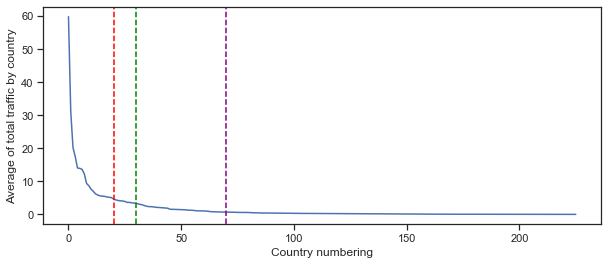

In [3]:
# How to set a cutline
plt.figure(figsize=(10,4))
plt.plot(np.mean(np.sum(travel_tensors_raw, axis=0)[:226,:226], axis=0))
plt.axvline(x=20, linestyle='--', color='red')
plt.axvline(x=30, linestyle='--', color='green')
plt.axvline(x=70, linestyle='--', color='purple')
plt.ylabel("Average of total traffic by country")
plt.xlabel("Country numbering")

In [4]:
country_cutline = 30 # 69, 70 give None homogeneity
travel_tensors = travel_tensors_raw[:,0:country_cutline,0:country_cutline]

In [5]:
# # homo_list[10][[homo_list[10] is not None]]
# # print(homo_list[10][30] is None)
# not_none_list = []
# for i in range(len(homo_list[10])): 
#     if(homo_list[10][i] is not None):
#         not_none_list.append(i)
# not_none_list

In [6]:
adj_list = []
for i in range(95):
    ajm = np.sum(travel_tensors[105 + i:][:,0:country_cutline,0:country_cutline], axis=0)
    adj_list.append(ajm)

In [7]:
with open('../pkl/[weekly]home_adj_from20180107_sorted.pkl', 'rb') as f:
    home_adj_list_raw = pickle.load(f) 

In [8]:
len(home_adj_list_raw)

95

In [9]:
len(adj_list)

95

Text(0.5, 0, 'Country numbering')

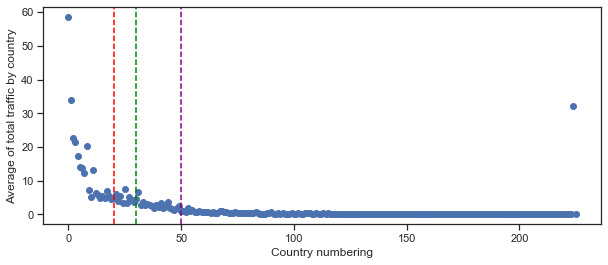

In [10]:
# How to set a cutline
plt.figure(figsize=(10,4))
plt.scatter(range(226), np.mean(np.sum(home_adj_list_raw, axis=0)[:226,:226], axis=0))
plt.axvline(x=20, linestyle='--', color='red')
plt.axvline(x=30, linestyle='--', color='green')
plt.axvline(x=50, linestyle='--', color='purple')
plt.ylabel("Average of total traffic by country")
plt.xlabel("Country numbering")

In [11]:
home_adj_list = np.array(home_adj_list_raw)[:,0:country_cutline,0:country_cutline]

In [12]:
week_slices = pd.date_range('2016-01-04', periods=200+1, freq='W')

In [13]:
travel_df = pd.read_csv('../csv/global_travel_df.csv')
countries = travel_df['node'].unique().T

In [14]:
with open('../pkl/new_country_order.pkl', 'rb') as f:
    new_order = pickle.load(f) 

In [15]:
countries[new_order]

array(['US', 'GB', 'FR', 'ES', 'IT', 'DE', 'MX', 'CA', 'JP', 'NL', 'BR',
       'TH', 'ID', 'MY', 'SG', 'BE', 'AE', 'AU', 'CH', 'PH', 'IE', 'PT',
       'AR', 'TR', 'RU', 'KW', 'CN', 'IN', 'HK', 'AT', 'GR', 'KR', 'SA',
       'CO', 'SE', 'ZA', 'TW', 'CZ', 'DK', 'CL', 'NO', 'PE', 'PL', 'NZ',
       'EG', 'VN', 'QA', 'HU', 'DO', 'MA', 'IS', 'FI', 'HR', 'CR', 'BH',
       'LU', 'BS', 'IL', 'UY', 'CU', 'VE', 'UA', 'JM', 'VA', 'EC', 'PA',
       'CY', 'NG', 'JO', 'RS', 'RO', 'PY', 'LK', 'CD', 'KE', 'BG', 'MC',
       'MM', 'KH', 'MO', 'LB', 'LV', 'SI', 'PK', 'OM', 'BB', 'GU', 'HN',
       'BD', 'BO', 'TZ', 'AW', 'SK', 'IR', 'EE', 'GH', 'GE', 'BA', 'MT',
       'ZW', 'SY', 'AD', 'AZ', 'GT', 'MV', 'IM', 'SV', 'ET', 'BW', 'NP',
       'PR', 'BY', 'ME', 'DZ', 'KY', 'LT', 'BZ', 'TT', 'TC', 'NI', 'IQ',
       'SX', 'CW', 'LA', 'UG', 'MU', 'TN', 'HT', 'BN', 'KZ', 'MK', 'AG',
       'GI', 'GP', 'MZ', 'RW', 'AM', 'MQ', 'LC', 'PF', 'SC', 'SN', 'GL',
       'ZM', 'AO', 'AL', 'BM', 'SM', 'AF', 'CI', 'V

In [16]:
label_dict = dict(zip(np.char.mod('%d', range(226)), countries[new_order]))
label_dict = dict(zip(range(country_cutline), countries[new_order]))

In [17]:
# This is a dictionary of country numbers & their names
print(label_dict)

{0: 'US', 1: 'GB', 2: 'FR', 3: 'ES', 4: 'IT', 5: 'DE', 6: 'MX', 7: 'CA', 8: 'JP', 9: 'NL', 10: 'BR', 11: 'TH', 12: 'ID', 13: 'MY', 14: 'SG', 15: 'BE', 16: 'AE', 17: 'AU', 18: 'CH', 19: 'PH', 20: 'IE', 21: 'PT', 22: 'AR', 23: 'TR', 24: 'RU', 25: 'KW', 26: 'CN', 27: 'IN', 28: 'HK', 29: 'AT'}


In [18]:
from scipy.stats import entropy

# def socgeo_entropy(cnt_num, adjmat):
#     sum_vertical = np.sum(adjmat[:,cnt_num])+ 1e-20
#     pl =adjmat[:,cnt_num] / sum_vertical
#     return entropy(pl)
def socgeo_entropy(adjmat):
    sum_vertical = np.sum(adjmat, axis=0)+ 1e-20
    pl = adjmat / sum_vertical
    # calculate entropy
    entropylist = []
    for i in range(len(pl)):
#         if(np.sum(pl[:,i])!=0):
        entropylist.append(entropy(pl[:,i]))
#         else:
#             entropylist.append(-1)
    return entropylist

In [19]:
# socgeo_entropy(home_adj_list[8])
# adjmat = home_adj_list[0]
# location = adjmat[:,0]
# visitors = np.argwhere(location>0).T[0]

In [20]:
from scipy import spatial
import itertools

# def homogeneity(cnt_num, adjmat):
#     location = adjmat[:,cnt_num]
#     visitors = np.argwhere(location>0).T[0]
# #     adjmat[visitors]
#     comb = list(itertools.combinations(visitors, 2))
#     result = 0
#     for c in comb:
#         result += 1 - spatial.distance.cosine(adjmat[c[0]], adjmat[c[1]])
#     if(len(visitors)*(len(visitors)-1) != 0):
#         value =result/(len(visitors)*(len(visitors)-1))
#     else:
#         value = None
#     return value
def homogeneity(cnt_num, adjmat):
#     adjmat=(adjmat>0)*1
    location = adjmat[:,cnt_num]
    visitors = np.argwhere(location>0).T[0]
    comb = list(itertools.combinations(visitors, 2))
    result = 0
    for c in comb:
        result += 1 / spatial.distance.cosine(adjmat[c[0]], adjmat[c[1]])
    if(len(visitors)*(len(visitors)-1) != 0):
        value =result/(len(visitors)*(len(visitors)-1))
    else:
        value = None
    return value

In [21]:
# for i in range(30):
#     print(homogeneity(i, adj_list[15]))

In [22]:
# def popularity(cnt_num, adjmat):
#     location = adjmat[:,cnt_num]
#     in_weight_sum = np.sum(location)
#     visitors = (np.argwhere(location>0).T[0])
#     num_of_neighbors = np.sum(visitors>=0)
#     return in_weight_sum/num_of_neighbors
def popularity(adjmat):
    in_weight_sum = np.sum(adjmat, axis=0)
    in_degree_sum = np.sum((adjmat>0), axis=0)+1e-20
    popul = np.divide(in_weight_sum, in_degree_sum)
    return popul

In [23]:
# popularity(adjmat)

In [24]:
# G= nx.from_numpy_array(adjmat, type='diGraph')
G = nx.from_numpy_matrix(home_adj_list[2], create_using=nx.DiGraph)
btwcent = nx.betweenness_centrality(G, weight='weight')
brokerage = np.array(list(btwcent.values()))

In [25]:
# adjmat[validx][:,validx].shape

In [26]:
def serial_brokerage(adj_list, plot=False):
    index = 0
    brokerage_list =[]
    for adjmat in adj_list:
        G = nx.from_numpy_matrix(adjmat, create_using=nx.DiGraph)
        btwcent = nx.betweenness_centrality(G, weight='weight')
        brokerage = np.array(list(btwcent.values()))
        brokerage_list.append(brokerage)
        if(plot is True):
            plt.figure(figsize=(12,5))
            plt.scatter(range(len(brokerage)),brokerage)
            plt.scatter([0,12],brokerage[[0,12]])
            plt.text(0,brokerage[0],'US')
            plt.text(12,brokerage[12],'GB')    
            plt.title("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
            plt.ylabel("brokerage")
            plt.xlabel("country numbers")
        index+=1
    return brokerage_list

In [27]:
def serial_entropy(home_adj_list, plot=False):
    index =0
    entropy_list = []
    for adjmat in home_adj_list:
        ent = socgeo_entropy(adjmat)
        entropy_list.append(ent)
        if(plot is True):
            plt.figure(figsize=(12,5))
            plt.scatter(range(len(ent)), ent)
            plt.scatter([0,12], np.array(ent)[[0,12]])
            plt.text(0,np.array(ent)[0],'US')
            plt.text(12,np.array(ent)[12],'GB')    
            plt.title("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
            plt.ylabel("Entropy")
            plt.xlabel("Country numbers")
        index += 1
    return entropy_list

In [28]:
def serial_popularity(adj_list, plot=False):
    index=0
    pop_list = []
    for adjmat in adj_list:
        pop = popularity(adjmat)
        pop_list.append(pop)
        if(plot is True):
            plt.figure(figsize=(12,5))
            plt.scatter(range(len(pop)), pop)
            plt.scatter([0,12], pop[[0,12]])
            plt.title("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
            plt.text(0,pop[0],'US')
            plt.text(12,pop[12],'GB')      
            plt.ylabel("Average In-weight (popularity)")
            plt.xlabel("country numbers")
        index+=1
    return pop_list

In [29]:
def serial_homogeneity(home_adj_list, plot=False):
    index =0
    homo_list = []
    for adjmat in home_adj_list:
        hom=[]
        for i in range(len(adjmat)):
            hom.append(homogeneity(i, adjmat))
        hom = np.array(hom)
        homo_list.append(np.array(hom))
        if(plot is True):
            plt.figure(figsize=(12,5))
            plt.scatter(range(len(hom)), hom)
            plt.scatter([0,12], hom[[0,12]])
            plt.text(0,hom[0],'US')
            plt.text(12,hom[12],'GB') 
            plt.title("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
            plt.ylabel("Homogeneity")
            plt.xlabel("country numbers")
        index +=1
    return homo_list

In [30]:
def valid_index(input_array):
    not_none_list = []
    for i in range(len(input_array)): 
        if(input_array[i] is not None):
            not_none_list.append(i)
    return np.array(not_none_list)

In [31]:
brokerage_list = serial_brokerage(adj_list)
pop_list = serial_popularity(adj_list)
entropy_list = serial_entropy(home_adj_list)
homo_list = serial_homogeneity(home_adj_list)

/Users/gimpuleumoe/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2664: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)
/Users/gimpuleumoe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars


In [32]:
pop_list[10]

array([180.24137931,  86.10714286,  68.71428571,  59.85185185,
        45.48148148,  41.30769231,  56.34615385,  56.        ,
        36.69565217,  29.44      ,  21.13636364,  19.31818182,
        14.34782609,  20.95238095,  19.5       ,  24.33333333,
        12.52      ,  20.19047619,  21.91304348,  22.05      ,
        33.4375    ,  29.4375    ,  19.21052632,  11.5       ,
        12.48      ,   8.89473684,  14.95454545,  15.20833333,
        14.47368421,  18.25      ])

In [33]:
len(brokerage_list)

95

In [34]:
validx = valid_index(homo_list[9])

             brokerage  popularity   entropy  homogeneity
brokerage     1.000000   -0.179930 -0.339479     0.501917
popularity   -0.179930    1.000000  0.492324    -0.240383
entropy      -0.339479    0.492324  1.000000     0.145455
homogeneity   0.501917   -0.240383  0.145455     1.000000


ValueError: supplied range of [0.5325942380420454, inf] is not finite

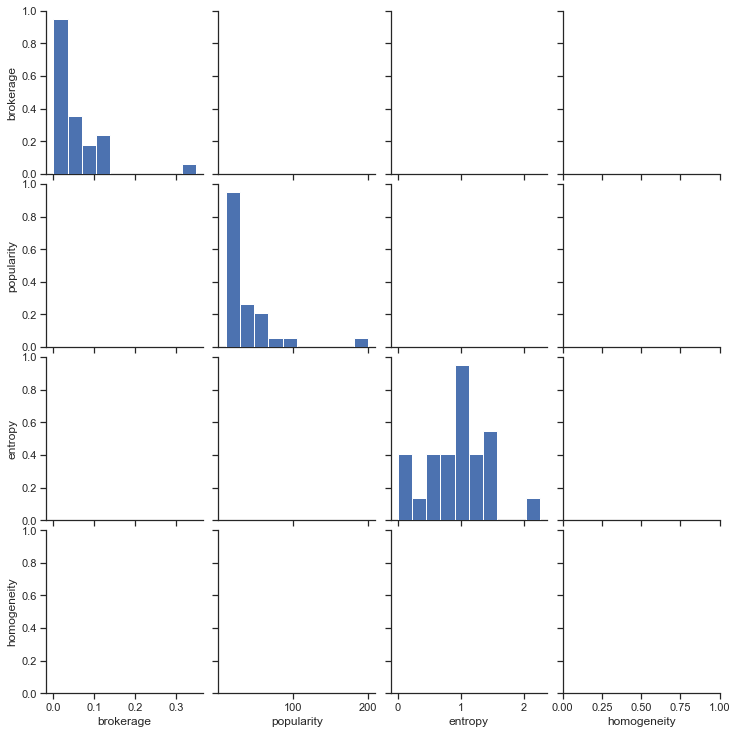

In [35]:
time_index = 0
# for time_index in range(11):
df = pd.DataFrame([brokerage_list[time_index], pop_list[time_index], entropy_list[time_index], homo_list[time_index]]).T
df.columns = ['brokerage','popularity','entropy','homogeneity']
#     print("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
print(df.corr())
g=sns.pairplot(df)
g.fig.suptitle("index "+str(time_index)+ ". from:" + str(week_slices[156-52+4*time_index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*time_index].strftime("%y/%m/%d")))


In [36]:
corr_list = []
for time_index in range(len(brokerage_list)):
    df = pd.DataFrame([brokerage_list[time_index], pop_list[time_index], entropy_list[time_index], homo_list[time_index]]).T
    df.columns = ['brokerage','popularity','entropy','homogeneity']
    corr_list.append(np.array(df.corr()))

In [37]:
corr_list = np.array(corr_list)

In [38]:
len(xaxis)

NameError: name 'xaxis' is not defined

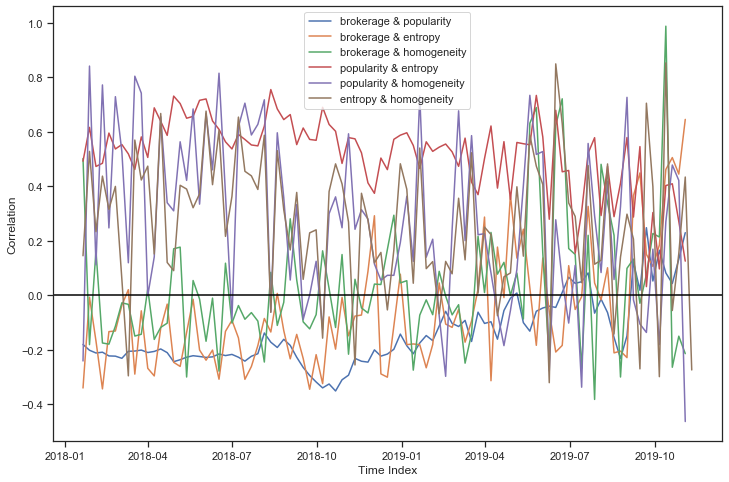

In [41]:
plt.figure(figsize=(12,8))
xaxis = week_slices[106:]
plt.plot(xaxis, corr_list[:,0,1], label=(df.columns[0] +" & "+ df.columns[1]))
plt.plot(xaxis, corr_list[:,0,2], label=(df.columns[0] +" & "+ df.columns[2]))
plt.plot(xaxis, corr_list[:,0,3], label=(df.columns[0] +" & "+ df.columns[3]))
plt.plot(xaxis, corr_list[:,1,2], label=(df.columns[1] +" & "+ df.columns[2]))
plt.plot(xaxis, corr_list[:,1,3], label=(df.columns[1] +" & "+ df.columns[3]))
plt.plot(xaxis, corr_list[:,2,3], label=(df.columns[2] +" & "+ df.columns[3]))
plt.ylabel("Correlation")
plt.xlabel("Time Index")
plt.axhline(y=0, linestyle='-', color='black')
# plt.axvline(x=xaxis[-3], linestyle='--', color='red')
plt.legend()
plt.show()

In [42]:
print((df.columns[0] +" & "+ df.columns[1]), np.mean(corr_list[:,0,1]))
print((df.columns[0] +" & "+ df.columns[2]), np.mean(corr_list[:,0,2]))
print((df.columns[0] +" & "+ df.columns[3]), np.mean(corr_list[:,0,3]))
print((df.columns[1] +" & "+ df.columns[2]), np.mean(corr_list[:,1,2]))
print((df.columns[1] +" & "+ df.columns[3]), np.mean(corr_list[:,1,3]))
print((df.columns[2] +" & "+ df.columns[3]), np.mean(corr_list[:,2,3]))

brokerage & popularity nan
brokerage & entropy nan
brokerage & homogeneity nan
popularity & entropy nan
popularity & homogeneity nan
entropy & homogeneity 0.26538499948401323


In [43]:
week_slices[156-52:-1:4]

DatetimeIndex(['2018-01-07', '2018-02-04', '2018-03-04', '2018-04-01',
               '2018-04-29', '2018-05-27', '2018-06-24', '2018-07-22',
               '2018-08-19', '2018-09-16', '2018-10-14', '2018-11-11',
               '2018-12-09', '2019-01-06', '2019-02-03', '2019-03-03',
               '2019-03-31', '2019-04-28', '2019-05-26', '2019-06-23',
               '2019-07-21', '2019-08-18', '2019-09-15', '2019-10-13'],
              dtype='datetime64[ns]', freq='4W-SUN')

In [44]:
['2019-01-06 ~ 2019-02-02', '2019-02-03 ~ 2019-03-02', '2019-03-03 ~ 2019-03-30', '2019-03-31 ~ 2019-04-27',
'2019-04-28 ~ 2019-05-25', '2019-05-26 ~ 2019-06-22', '2019-06-23 ~ 2019-07-20', '2019-07-21 ~ 2019-08-17',
'2019-08-18 ~ 2019-09-14', '2019-09-15 ~ 2019-10-12', '2019-10-13 ~ 2019-11-19']

['2019-01-06 ~ 2019-02-02',
 '2019-02-03 ~ 2019-03-02',
 '2019-03-03 ~ 2019-03-30',
 '2019-03-31 ~ 2019-04-27',
 '2019-04-28 ~ 2019-05-25',
 '2019-05-26 ~ 2019-06-22',
 '2019-06-23 ~ 2019-07-20',
 '2019-07-21 ~ 2019-08-17',
 '2019-08-18 ~ 2019-09-14',
 '2019-09-15 ~ 2019-10-12',
 '2019-10-13 ~ 2019-11-19']

In [45]:
homo_df = pd.DataFrame(homo_list)
homo_df.replace(to_replace=[None], value=np.nan, inplace=True)

In [46]:
np.nanmean(homo_df, axis=1)

array([           inf, 2.51036769e+12,            inf, 8.99891107e-01,
       1.10598596e+00, 1.11980229e+00, 1.31975638e+00,            inf,
       1.14475494e+00, 9.78151452e-01,            inf,            inf,
       8.06603010e-01, 9.94461176e-01,            inf, 8.28963874e-01,
       9.75514532e-01,            inf,            inf, 1.40728429e+00,
       9.76553568e-01,            inf, 9.58071880e-01,            inf,
       8.27897217e-01,            inf,            inf, 9.06335615e-01,
       9.39773102e-01,            inf,            inf, 1.03328022e+00,
       1.32924809e+00,            inf,            inf,            inf,
       1.56332772e+00,            inf, 8.42464441e-01, 9.37250339e-01,
       9.19137317e-01, 9.52846850e-01, 9.54227653e-01, 1.11482639e+00,
       9.16883545e-01,            inf, 1.31721035e+00, 1.07622595e+00,
       9.51373233e-01, 9.31360645e-01, 9.97676952e-01,            inf,
       1.14595219e+00, 9.13818507e-01, 1.21997369e+00,            inf,
      

In [47]:
np.mean(np.array(brokerage_list), axis=1)

array([0.05371511, 0.05416213, 0.05296054, 0.05280054, 0.05306818,
       0.05284125, 0.05248193, 0.05313202, 0.05246643, 0.05213895,
       0.05196038, 0.05156287, 0.05109087, 0.04983161, 0.04886529,
       0.04961138, 0.0489508 , 0.05066357, 0.05045921, 0.05032601,
       0.05044236, 0.05159149, 0.05077406, 0.04981383, 0.04964256,
       0.04951175, 0.04907424, 0.05000689, 0.05048359, 0.0496022 ,
       0.0490014 , 0.04914537, 0.04796376, 0.04659557, 0.04626878,
       0.04652941, 0.04773021, 0.04760805, 0.04715129, 0.04601197,
       0.04633317, 0.04709001, 0.04812565, 0.04854835, 0.04910844,
       0.04895036, 0.04961454, 0.04889711, 0.04965835, 0.04854525,
       0.04340507, 0.04327839, 0.04368587, 0.04294077, 0.04338191,
       0.0441208 , 0.04562032, 0.04474767, 0.04354914, 0.04487545,
       0.04622148, 0.04560008, 0.04527026, 0.04796004, 0.04818299,
       0.04927247, 0.04828404, 0.04929578, 0.0508592 , 0.04935667,
       0.04936355, 0.04937112, 0.04897166, 0.04916487, 0.05035

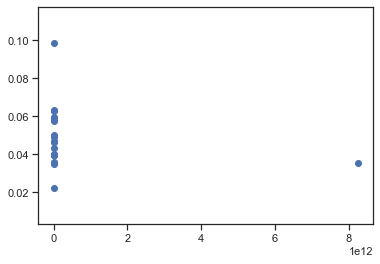

In [48]:
# plot mean homogeneity vs mean brokerage
homo_df = pd.DataFrame(homo_list)
homo_df.replace(to_replace=[None], value=np.nan, inplace=True)
mean_homo = np.nanmean(homo_df, axis=0)
mean_entropy = np.nanmean(entropy_list, axis=0)
mean_brokerage= np.mean(np.array(brokerage_list), axis=0)

plt.scatter(mean_homo, mean_brokerage)

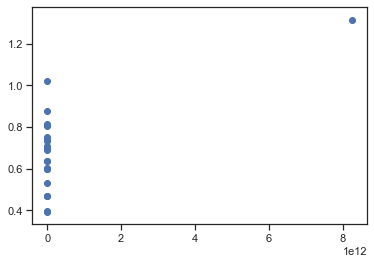

In [49]:
plt.scatter(mean_homo, mean_entropy)

In [50]:
week_slices[-20]

Timestamp('2019-06-30 00:00:00', freq='W-SUN')

In [51]:
xaxis[-3]
travel_tensors_raw[-3]

array([[0., 5., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 4., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

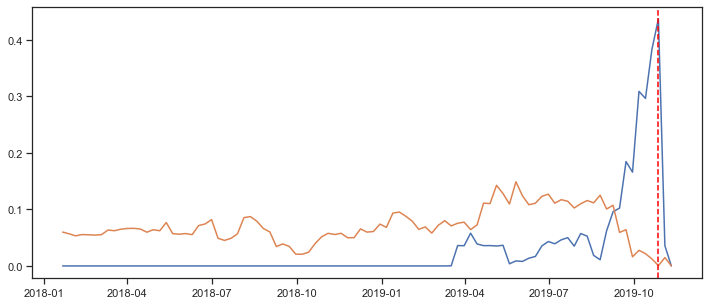

In [52]:
plt.figure(figsize=(12,5))
plt.plot(xaxis, np.array(brokerage_list)[:,0])
# plt.plot(xaxis, np.array(brokerage_list)[:,1])
# plt.plot(xaxis, np.array(brokerage_list)[:,2])
plt.plot(xaxis, np.array(brokerage_list)[:,3])
plt.axvline(x=xaxis[-3], linestyle='--', color='red')
# plt.plot(np.array(brokerage_list)[:,4])
# plt.plot(np.array(brokerage_list)[:,5])

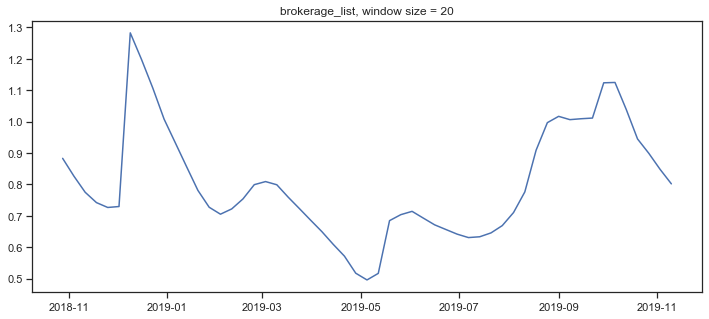

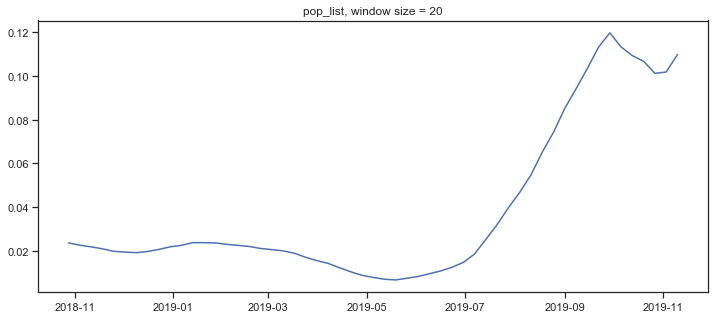

In [56]:
W = 20
# feat_arr = [out_d_ar, out_w_ar, in_d_ar, in_w_ar, neig_ar, recep_n_ar, tri_ar, avg_iw_ar, avg_ow_ar, max_iw_ar, max_ow_ar, max_wr_ar]
feat_arr = [brokerage_list, pop_list] # , entropy_list, homo_list
feat_title = ['brokerage_list', 'pop_list','entropy_list','homo_list']
z_collection = []
iter = 0
#############################################################################
# different pattern from LOF of TBAD
# more stationary. 
# in_d: reasoanble seasonality. star to incrase from July
#############################################################################
for feature in feat_arr:
    feat = feature # out_w_ar, recep_n_ar
    cov_series = []
    for t in range(W, len(feat)):
        C = np.cov(np.array(feat)[t-W:t].T)
        cov_series.append(C)

    u1_list = []
    for i in cov_series:
        U, S, V =np.linalg.svd(i)
        u1_list.append(U[:,0])

    z_list = []
    for i in range(W, len(u1_list)):
        utv = np.dot(u1_list[i], np.mean(np.array(u1_list[i-W:i]), axis=0))
        z = 1-1* utv
        z_list.append(z)
    #############################################################################

#     week_slices = pd.date_range('2016-01-04', periods=200, freq='W')
    plt.figure(figsize=(12,5))
    plt.plot(xaxis[2*W:],z_list)
#     plt.plot(range(-Time_interval+2*W + 40, -40), z_list[40:-40])
    plt.title(feat_title[iter]+ ", window size = " +str(W))
    iter +=1
    #############################################################################
    z_collection.append(np.array(z_list))

In [55]:
xaxis

DatetimeIndex(['2018-01-21', '2018-01-28', '2018-02-04', '2018-02-11',
               '2018-02-18', '2018-02-25', '2018-03-04', '2018-03-11',
               '2018-03-18', '2018-03-25', '2018-04-01', '2018-04-08',
               '2018-04-15', '2018-04-22', '2018-04-29', '2018-05-06',
               '2018-05-13', '2018-05-20', '2018-05-27', '2018-06-03',
               '2018-06-10', '2018-06-17', '2018-06-24', '2018-07-01',
               '2018-07-08', '2018-07-15', '2018-07-22', '2018-07-29',
               '2018-08-05', '2018-08-12', '2018-08-19', '2018-08-26',
               '2018-09-02', '2018-09-09', '2018-09-16', '2018-09-23',
               '2018-09-30', '2018-10-07', '2018-10-14', '2018-10-21',
               '2018-10-28', '2018-11-04', '2018-11-11', '2018-11-18',
               '2018-11-25', '2018-12-02', '2018-12-09', '2018-12-16',
               '2018-12-23', '2018-12-30', '2019-01-06', '2019-01-13',
               '2019-01-20', '2019-01-27', '2019-02-03', '2019-02-10',
      